# Clustering Algorithms With Python

Clustering or cluster analysis is an unsupervised learning problem.

It is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior.

Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

*Clustering techniques apply when there is no class to be predicted but rather when the instances are to be divided into natural groups.*

Clustering can be helpful as a data analysis activity in order to learn more about the problem domain, so-called pattern discovery or knowledge discovery.

*Clustering is an unsupervised learning technique, so it is hard to evaluate the quality of the output of any given method.*

Some clustering algorithms require you to specify or guess at the number of clusters to discover in the data, whereas others require the specification of some minimum distance between observations in which examples may be considered “close” or “connected.”

The scikit-learn library provides a suite of different clustering algorithms to choose from.

There is no best clustering algorithm, and no easy way to find the best algorithm for your data without using controlled experiments.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris

iris = load_iris() #Load data set 
X= iris.data  # Features

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## K Means

K-Means Clustering algorithm involves assigning examples to clusters in an effort to minimize the variance within each cluster

It is implemented via the KMeans class and the main configuration to tune is the *“n_clusters”* hyperparameter set to the estimated number of clusters in the data.

In [97]:
from sklearn.cluster import KMeans
# define the model
model = KMeans(n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)

In [98]:
# retrieve unique clusters
from numpy import unique

clusters = unique(yhat)

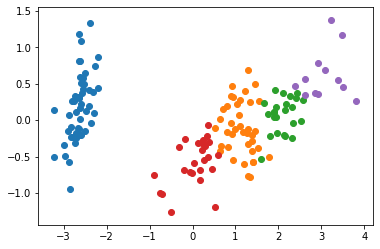

In [101]:
from numpy import where
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Xp[row_ix, 0], Xp[row_ix,1])

# show the plot
plt.show()

## DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

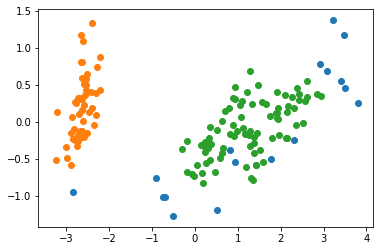

In [121]:
# dbscan clustering
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.50, min_samples=5)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)# create scatter of these samples
    plt.scatter(Xp[row_ix, 0], Xp[row_ix, 1])

# show the plot
plt.show()

# Agglomerative Clustering
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering methods 

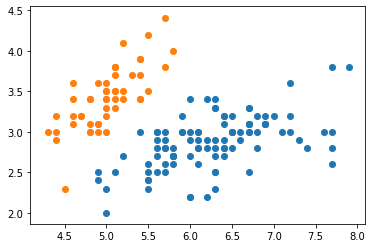

In [106]:
# agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
plt.show()

## Dendrograms

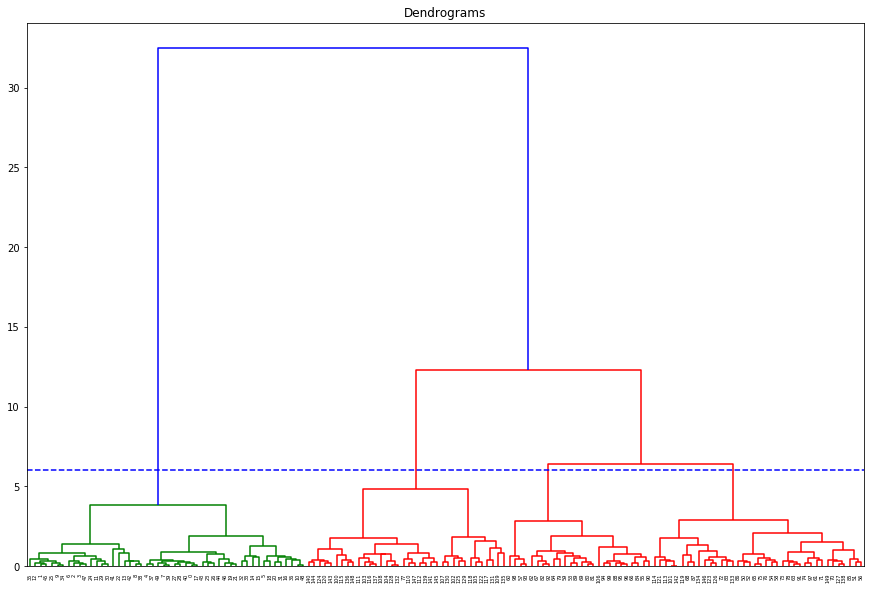

In [114]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=6, color='b', linestyle='--')

### linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

**‘ward’** minimizes the variance of the clusters being merged.

**‘average’** uses the average of the distances of each observation of the two sets.

**‘complete’ or ‘maximum’** linkage uses the maximum distances between all observations of the two sets.

**‘single’** uses the minimum of the distances between all observations of the two sets.

## BIRCH
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted

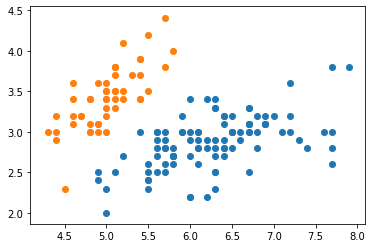

In [118]:
# birch clustering

from sklearn.cluster import Birch

# define the model
model = Birch(threshold=0.01, n_clusters=2)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

    # show the plot
plt.show()